# Ethan's Coded Analysis
**Goal**: My goal is to answer the following:
- How does the probability of >50K income earners differ with race and sex?
- How do those differences change when factoring in education and occupation?

## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option('display.max_columns', 500)
plt.style.use('fivethirtyeight')

## Load Data

In [2]:
df = pd.read_csv('../data/adult.csv')

## Looking at the Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


**Notes**: 
- 32,561 total records.
- No NaN values present.
- Potential Bias: age, workclass, education, race, sex, native country, and income

In [4]:
df.head(3)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K


**Notes**:
- ? used for unknown values

In [5]:

df.tail(3)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [6]:

df.sample(3)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
11489,33,Private,198211,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
9420,62,Private,368476,5th-6th,3,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,24,Mexico,<=50K
14767,56,Private,205735,1st-4th,2,Separated,Machine-op-inspct,Unmarried,White,Male,0,0,40,United-States,<=50K


In [7]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


**Notes**:
- Age spread is 17 to 90.
- 3/4 of capital gain and loss are 0.
- Average hours per week is 40.

In [8]:
print(f"Race Value Counts:\n{df['race'].value_counts()}")

Race Value Counts:
race
White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: count, dtype: int64


In [9]:
print(df[df['race'] == 'White']['race'].count() / df[df['race'] != 'White']['race'].count())

5.862170706006323


**Notes**: Race of White to others is 5.86

In [10]:
print(f"Sex Value Counts:\n{df['sex'].value_counts()}")

Sex Value Counts:
sex
Male      21790
Female    10771
Name: count, dtype: int64


In [11]:
print(df[df['sex'] == 'Male']['sex'].count() / df[df['sex'] == 'Female']['sex'].count())

2.0230247887846997


**Notes**: Male to female ratio is 2.02

In [12]:
print(f"Education Value Counts:\n{df['education'].value_counts()}")

Education Value Counts:
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64


**Notes**: Majority of the data at least finished high school.

In [13]:
print(f"Income Value Counts:\n{df['income'].value_counts()}")

Income Value Counts:
income
<=50K    24720
>50K      7841
Name: count, dtype: int64


**Notes**: Majority of the data population makes less than 50k

In [14]:
print(df[df['income'] == '>50K']['race'].value_counts())
df_50k_plus =  df[df['income'] == '>50K']
white_rich_count = df_50k_plus[df_50k_plus['race'] == 'White']['race'].count()
not_white_rich_count = df_50k_plus[df_50k_plus['race'] != 'White']['race'].count()
print(f"Ratio: {white_rich_count / not_white_rich_count}")

race
White                 7117
Black                  387
Asian-Pac-Islander     276
Amer-Indian-Eskimo      36
Other                   25
Name: count, dtype: int64
Ratio: 9.83011049723757


**Notes**:
- Those that do make more than 50k have a heavy class imbalance with the White race.
- Ratio of 9.83 of white 50k> income earners to none white 50k> earners.

In [15]:
df[df['education'] == 'Preschool'].sample(20)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1678,27,Private,211032,Preschool,1,Married-civ-spouse,Farming-fishing,Other-relative,White,Male,41310,0,24,Mexico,<=50K
25289,54,Private,349340,Preschool,1,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,India,<=50K
27861,66,Private,236879,Preschool,1,Widowed,Priv-house-serv,Other-relative,White,Female,0,0,40,Guatemala,<=50K
11261,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
26198,23,Private,240049,Preschool,1,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Female,0,0,40,Laos,<=50K
26098,23,Private,69911,Preschool,1,Never-married,Other-service,Own-child,White,Female,0,0,15,United-States,<=50K
27931,34,Local-gov,144182,Preschool,1,Never-married,Adm-clerical,Own-child,Black,Female,0,0,25,United-States,<=50K
23541,39,Private,341741,Preschool,1,Never-married,Other-service,Not-in-family,White,Female,0,0,12,United-States,<=50K
23203,41,Local-gov,160893,Preschool,1,Never-married,Handlers-cleaners,Own-child,White,Female,0,0,30,United-States,<=50K
25737,32,Private,223212,Preschool,1,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,Mexico,<=50K


**Notes**: Based on this sample, occupation could correlate to education level.

In [16]:
print(f"{df[df['capital.gain'] == 0]['capital.gain'].count()} of {df['capital.gain'].count()} records for capital.gain is 0")
print(f"{df[df['capital.loss'] == 0]['capital.loss'].count()} of {df['capital.loss'].count()} records for capital.loss is 0")

29849 of 32561 records for capital.gain is 0
31042 of 32561 records for capital.loss is 0


## Analyze Bias to Answer Questions

### Race & Sex

Prep Data

In [17]:
race_sex_df = df.copy()
race_sex_df["race"] = race_sex_df["race"].astype(str).str.strip()
race_sex_df["sex"] = race_sex_df["sex"].astype(str).str.strip()
race_sex_df["income"] = race_sex_df["income"].astype(str).str.strip()

Feature Engineer

In [18]:
race_sex_df["high_income"] = (race_sex_df["income"] == ">50K").astype(int)
race_sex_df[["race", "sex", "income", "high_income"]].sample(10)

,race,sex,income,high_income
31721,White,Male,<=50K,0
21641,Black,Male,<=50K,0
15201,White,Female,<=50K,0
12607,White,Male,>50K,1
6981,White,Male,>50K,1
17497,White,Male,<=50K,0
7229,White,Male,<=50K,0
27367,Other,Female,<=50K,0
5948,White,Female,>50K,1
25957,White,Female,<=50K,0


Analyze

In [19]:
racesex_by_highincome = race_sex_df.groupby(["race", "sex"])["high_income"].agg(total_count="size", high_income_count="sum").reset_index()
racesex_by_highincome["high_income_rate"] = (racesex_by_highincome["high_income_count"] / racesex_by_highincome["total_count"])
racesex_by_highincome.sort_values("high_income_rate", ascending=False).head(20)

,race,sex,total_count,high_income_count,high_income_rate
3,Asian-Pac-Islander,Male,693,233,0.336219
9,White,Male,19174,6089,0.317565
5,Black,Male,1569,297,0.189293
1,Amer-Indian-Eskimo,Male,192,24,0.125000
2,Asian-Pac-Islander,Female,346,43,0.124277
8,White,Female,8642,1028,0.118954
7,Other,Male,162,19,0.117284
0,Amer-Indian-Eskimo,Female,119,12,0.100840
4,Black,Female,1555,90,0.057878
6,Other,Female,109,6,0.055046


**Note**: Black female has a really low percentage of ~5%

In [20]:
white_male_highincome = racesex_by_highincome[(racesex_by_highincome["race"] == "White") & (racesex_by_highincome["sex"] == "Male")]
white_male_high_rate = float(white_male_highincome["high_income_rate"].iloc[0])

racesex_by_highincome["white_male_difference"] = (racesex_by_highincome["high_income_rate"] - white_male_high_rate) * 100.0
racesex_by_highincome["percent_higher_than_white_male"] = ((racesex_by_highincome["high_income_rate"] / white_male_high_rate) - 1.0) * 100.0

racesex_by_highincome = racesex_by_highincome.sort_values("high_income_rate", ascending=False)
racesex_by_highincome

,race,sex,total_count,high_income_count,high_income_rate,white_male_difference,percent_higher_than_white_male
3,Asian-Pac-Islander,Male,693,233,0.336219,1.865388,5.874028
9,White,Male,19174,6089,0.317565,0.000000,0.000000
5,Black,Male,1569,297,0.189293,-12.827291,-40.392590
1,Amer-Indian-Eskimo,Male,192,24,0.125000,-19.256545,-60.638036
2,Asian-Pac-Islander,Female,346,43,0.124277,-19.328800,-60.865562
8,White,Female,8642,1028,0.118954,-19.861151,-62.541912
7,Other,Male,162,19,0.117284,-20.028150,-63.067787
0,Amer-Indian-Eskimo,Female,119,12,0.100840,-21.672512,-68.245810
4,Black,Female,1555,90,0.057878,-25.968764,-81.774525
6,Other,Female,109,6,0.055046,-26.251958,-82.666291


**Note**: Asian-Pac-Islander Male has a higher male to race rate than white males.

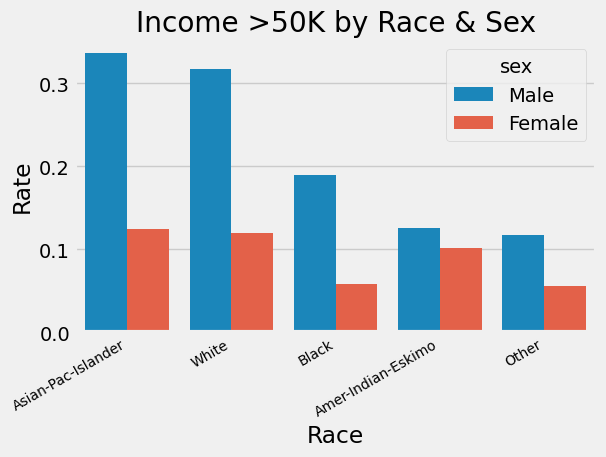

In [21]:
sns.barplot(data=racesex_by_highincome, x="race", y="high_income_rate", hue="sex")
plt.title("Income >50K by Race & Sex")
plt.xlabel("Race")
plt.ylabel("Rate")
plt.xticks(rotation=30, ha="right", fontsize=10)
plt.tight_layout()
plt.show()

### Education

Prep Data

In [22]:
education_df = race_sex_df.copy()
education_df["education"] = education_df["education"].astype(str).str.strip()

Analyze

In [23]:
education_by_highincome = education_df.groupby(["education", "race", "sex"])["high_income"].agg(total_count="size", high_income_count="sum").reset_index()
education_by_highincome.sample(20)

,education,race,sex,total_count,high_income_count
53,7th-8th,Black,Male,28,2
84,Assoc-voc,Other,Female,3,0
4,10th,Black,Female,64,0
109,HS-grad,Asian-Pac-Islander,Male,144,29
149,Some-college,Other,Male,26,6
38,1st-4th,White,Male,103,5
151,Some-college,White,Male,3938,1081
121,Masters,Black,Male,48,25
102,Doctorate,Black,Male,7,6
6,10th,Other,Female,5,0


In [24]:
education_by_highincome["high_income_rate"] = education_by_highincome["high_income_count"] / education_by_highincome["total_count"]
education_by_highincome.sort_values("high_income_rate", ascending=False).head(20)

,education,race,sex,total_count,high_income_count,high_income_rate
139,Prof-school,Other,Male,4,4,1.000000
116,Masters,Amer-Indian-Eskimo,Female,2,2,1.000000
134,Prof-school,Amer-Indian-Eskimo,Male,1,1,1.000000
99,Doctorate,Amer-Indian-Eskimo,Male,1,1,1.000000
133,Prof-school,Amer-Indian-Eskimo,Female,1,1,1.000000
102,Doctorate,Black,Male,7,6,0.857143
105,Doctorate,White,Male,289,230,0.795848
141,Prof-school,White,Male,435,344,0.790805
101,Doctorate,Black,Female,4,3,0.750000
136,Prof-school,Asian-Pac-Islander,Male,34,25,0.735294


In [25]:
other_education_ordered = education_df[education_df['race'] == 'Other']['education.num'].sort_values()
other_education_ordered

32446     1
22021     1
29120     2
27790     2
8316      2
         ..
30223    15
11299    15
1559     15
18384    16
21813    16
Name: education.num, Length: 271, dtype: int64

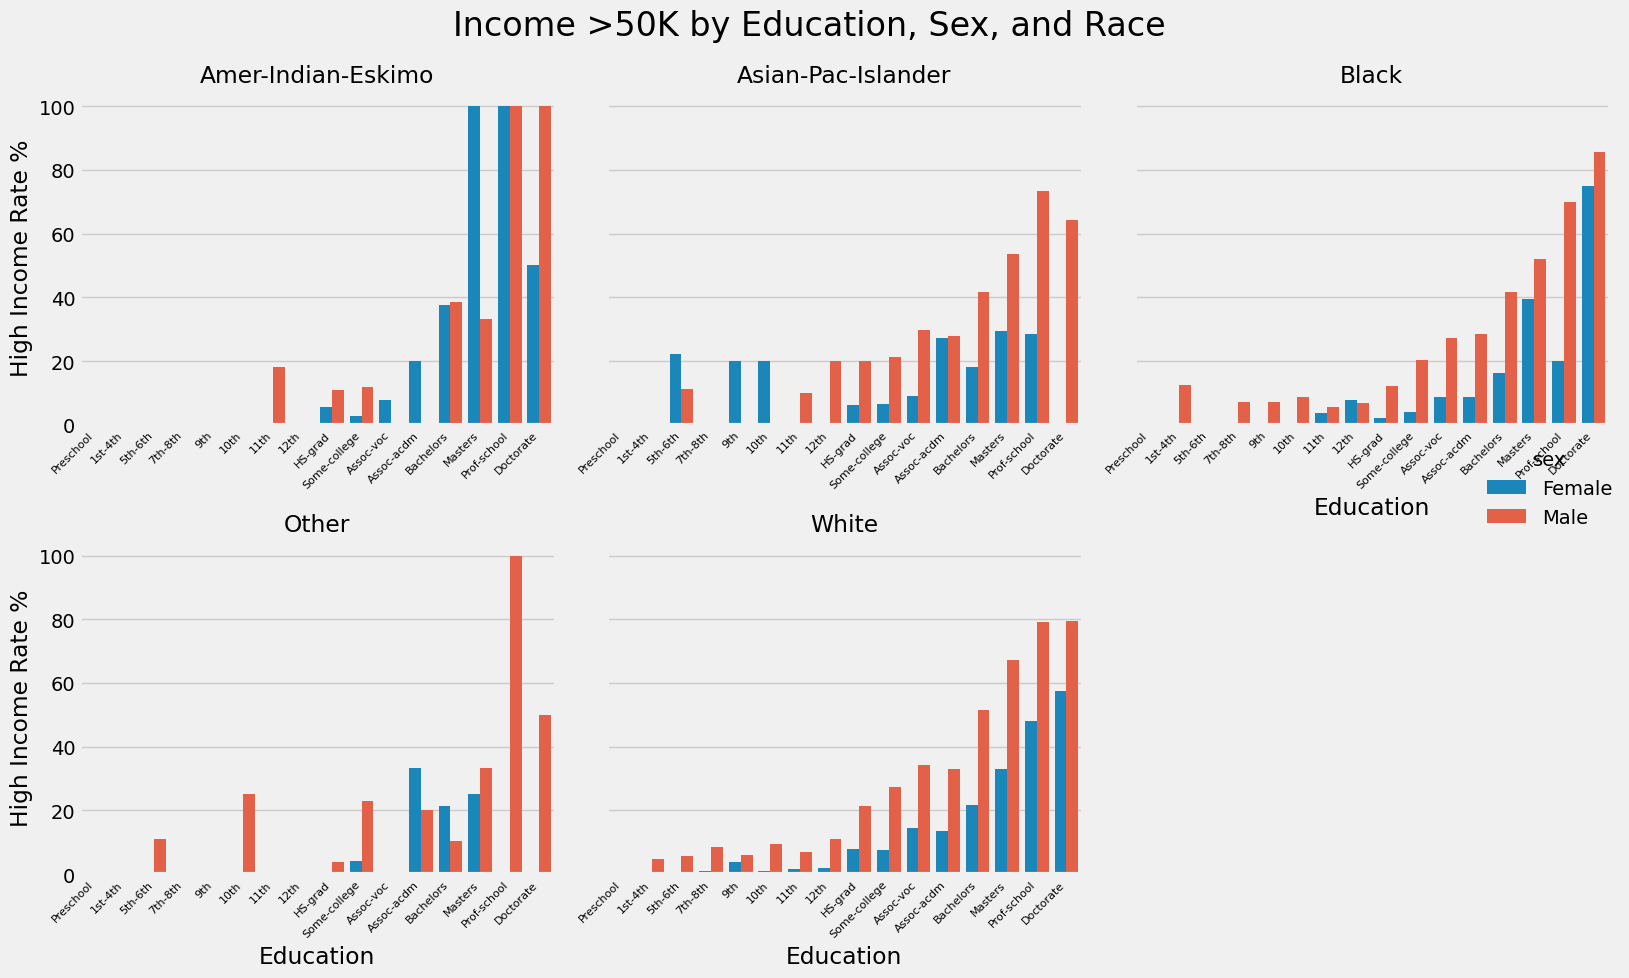

In [26]:

education_order = race_sex_df.groupby("education")["education.num"].mean().sort_values().index.tolist()
education_by_highincome["high_income_rate_percentage"] = education_by_highincome["high_income_rate"] * 100

plot = sns.catplot(data=education_by_highincome, x="education", y="high_income_rate_percentage", 
                hue="sex", col="race", kind="bar", col_wrap=3, sharex=False, order=education_order) # I google gemini for col_wrap and sharex (make them not share the x axis as some education labels werent showing up)

plot.set_titles("{col_name}") # I google gemini how to do this
plot.set_axis_labels("Education", "High Income Rate %")

# google gemini magic to get education labels rotated and sized properly
for ax in plot.axes.flatten():
    ax.tick_params(axis="x", labelrotation=45, labelsize=8)
    for label in ax.get_xticklabels():
        label.set_horizontalalignment("right")

plot.figure.suptitle("Income >50K by Education, Sex, and Race", fontsize=24)
plt.tight_layout()
plt.show()


**Note**: When the bar is at 100%, that's saying every record with that specific gender, for that race, with that education level has an income greater than 50k.
<br>Example, when looking at the Amer-Indian-Eskimo: Every record where a female Amer-Indian-Eskimo that has a doctorate has an income greater than 50k. But some males don't have greater than 50k.

### Occupation

In [27]:
occupation_df = race_sex_df.copy()
occupation_df["occupation"] = occupation_df["occupation"].astype(str).str.strip()

In [28]:
occupation_df["occupation"].value_counts()

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

In [29]:
occupation_by_highincome = occupation_df.groupby(["occupation", "race", "sex"])["high_income"].agg(total_count="size", high_income_count="sum").reset_index()
occupation_by_highincome.sample(20)

,occupation,race,sex,total_count,high_income_count
72,Other-service,Amer-Indian-Eskimo,Male,16,1
91,Prof-specialty,Black,Male,106,42
12,Adm-clerical,Asian-Pac-Islander,Female,83,7
67,Machine-op-inspct,Other,Female,13,0
54,Handlers-cleaners,Asian-Pac-Islander,Male,16,1
108,Sales,Asian-Pac-Islander,Male,75,19
77,Other-service,Other,Female,20,0
111,Sales,Other,Female,11,2
102,Protective-serv,Other,Male,5,1
61,Machine-op-inspct,Amer-Indian-Eskimo,Female,6,0


In [30]:
occupation_by_highincome["high_income_rate"] = occupation_by_highincome["high_income_count"] / occupation_by_highincome["total_count"]
occupation_by_highincome.sort_values("high_income_rate", ascending=False).head(20)

,occupation,race,sex,total_count,high_income_count,high_income_rate
42,Exec-managerial,White,Male,2669,1573,0.589359
95,Prof-specialty,White,Male,2348,1343,0.571976
36,Exec-managerial,Asian-Pac-Islander,Male,96,52,0.541667
89,Prof-specialty,Asian-Pac-Islander,Male,137,74,0.540146
93,Prof-specialty,Other,Male,16,8,0.500000
38,Exec-managerial,Black,Male,124,61,0.491935
124,Tech-support,White,Male,516,215,0.416667
118,Tech-support,Asian-Pac-Islander,Male,29,12,0.413793
91,Prof-specialty,Black,Male,106,42,0.396226
87,Prof-specialty,Amer-Indian-Eskimo,Male,18,7,0.388889


In [31]:
# chatgpt was used for this codeblock: https://chatgpt.com/share/698a990c-23d0-8012-b28a-45e65f1ecb40 
occ_order = ( occupation_df.groupby("occupation")["high_income"].mean().sort_values(ascending=True).index.tolist())
occupation_df["occupation.num"] = occupation_df["occupation"].map({occ: i for i, occ in enumerate(occ_order)}).astype("Int64")
race_sex_df["occupation.num"] = race_sex_df["occupation"].map({occ: i for i, occ in enumerate(occ_order)}).astype("Int64")

In [32]:
other_occupation_ordered = occupation_df[occupation_df['occupation'] == '?']['occupation.num'].sort_values()
other_occupation_ordered

0        3
2        3
14       3
24       3
44       3
        ..
32533    3
32534    3
32541    3
32543    3
32544    3
Name: occupation.num, Length: 1843, dtype: Int64

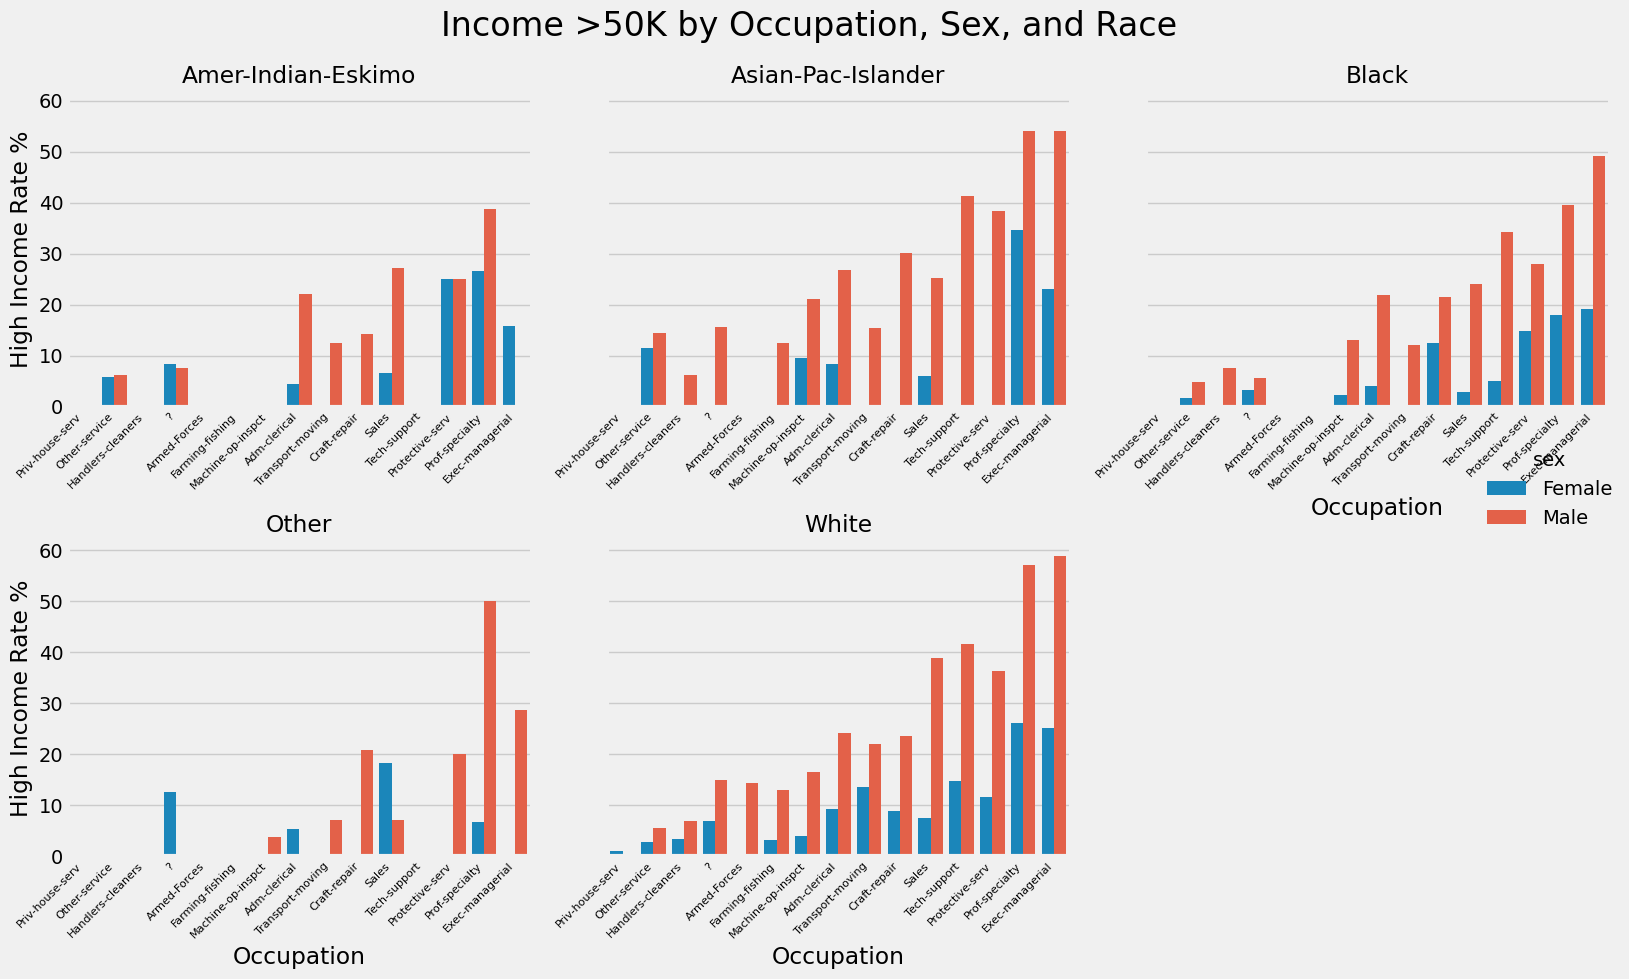

In [33]:
occupation_order = race_sex_df.groupby("occupation")["occupation.num"].mean().sort_values().index.tolist()
occupation_by_highincome["high_income_rate_percentage"] = occupation_by_highincome["high_income_rate"] * 100

plot = sns.catplot(data=occupation_by_highincome, x="occupation", y="high_income_rate_percentage", 
                hue="sex", col="race", kind="bar", col_wrap=3, sharex=False, order=occupation_order)

plot.set_titles("{col_name}")
plot.set_axis_labels("Occupation", "High Income Rate %")

for ax in plot.axes.flatten():
    ax.tick_params(axis="x", labelrotation=45, labelsize=8)
    for label in ax.get_xticklabels():
        label.set_horizontalalignment("right")

plot.figure.suptitle("Income >50K by Occupation, Sex, and Race", fontsize=24)
plt.tight_layout()
plt.show()